In [14]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [19]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

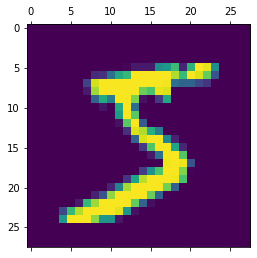

In [9]:
plt.matshow(X_train[0])

In [10]:
y_train[0]

5

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(20, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 20)                2580      
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 103,270
Trainable params: 103,270
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 908us/step - loss: 0.2624 - accuracy: 0.9244
Epoch 2/20
1875/1875 [==============================] - 2s 876us/step - loss: 0.1122 - accuracy: 0.9663
Epoch 3/20
1875/1875 [==============================] - 2s 873us/step - loss: 0.0773 - accuracy: 0.9764
Epoch 4/20
1875/1875 [==============================] - 2s 889us/step - loss: 0.0592 - accuracy: 0.9810
Epoch 5/20
1875/1875 [==============================] - 2s 880us/step - loss: 0.0467 - accuracy: 0.9851
Epoch 6/20
1875/1875 [==============================] - 2s 877us/step - loss: 0.0372 - accuracy: 0.9881
Epoch 7/20
1875/1875 [==============================] - 2s 879us/step - loss: 0.0309 - accuracy: 0.9901
Epoch 8/20
1875/1875 [==============================] - 2s 884us/step - loss: 0.0274 - accuracy: 0.9908
Epoch 9/20
1875/1875 [==============================] - 2s 881us/step - loss: 0.0222 - accuracy: 0.9923
Epoch 10/20
1875/1875 [==============================] - 2s 893u

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 652us/step - loss: 0.1257 - accuracy: 0.9765


[0.12567999958992004, 0.9764999747276306]

In [15]:
y_pred = model.predict(X_test)

313/313 [==============================] - 0s 592us/step


In [16]:
pred_labels = [np.argmax(i) for i in y_pred]
pred_labels[:11]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0]

In [17]:
y_test[:11]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0], dtype=uint8)

In [18]:
model.save('image_classifier_new.h5')

## Load model

In [7]:
model = keras.models.load_model('image_classifier_new.h5')

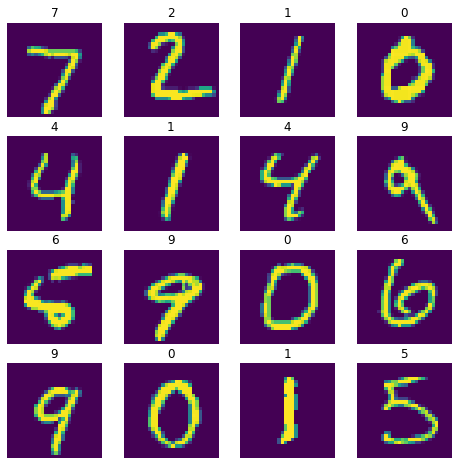

In [20]:
plt.figure(figsize=(8, 8))

for i in range(16):

  ax = plt.subplot(4, 4, i + 1)

  plt.imshow(X_test[i])

  plt.title(pred_labels[i])

  plt.axis("off")